# Chapter 6.4 - Sequence processing with convnets

In [1]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

In [2]:
max_features = 10000  
max_len = 500 

In [3]:
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [4]:
print('Pad sequences (samples x time)')
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [5]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
from keras.optimizers import RMSprop

In [9]:
model = Sequential()
model.add(Embedding(input_dim = max_features, 
                    output_dim = 128, 
                    input_length = max_len))
model.add(Conv1D(filters = 32, 
                 kernel_size = 7, 
                 activation = 'relu'))
model.add(MaxPooling1D(pool_size = 5))
model.add(Conv1D(filters = 32, 
                 kernel_size = 7, 
                 activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units = 1))

model.summary()

model.compile(optimizer = RMSprop(lr = 1e-4),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(x = x_train,
                    y = y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 4s 187us/step - loss: 0.7432 - acc: 0.5174 - val_loss: 0.6853 - val_acc: 0.5652
Epoch 2/10
20000/20000 [==============================] - 3s 157us/step - loss: 0.6685 - acc: 0.6577 - val_loss: 0.6641 - val_acc: 0.6682
Epoch 3/10
20000/20000 [==============================] - 3s 168us/step - loss: 0.6265 - acc: 0.7504 - val_loss: 0.6139 - val_acc: 0.7404
Epoch 4/10
20000/20000 [==============================] - 3s 160us/step - loss: 0.5364 - acc: 0.8092 - val_loss: 0.5009 - val_acc: 0.7966
Epoch 5/10
20000/20000 [==============================] - 3s 157us/step - loss: 0.4126 - acc: 0.8483 - val_loss: 0.4213 - val_acc: 0.8364
Epoch 6/10
20000/20000 [==============================] - 3s 155us/step - loss: 0.3432 - acc: 0.8668 - val_loss: 0.4144 - val_acc: 0.8392
Epoch 7/10
20000/20000 [==============================] - 3s 161us/step - loss: 0.3053 - acc: 0.8687 - val_loss: 0.4266 - v

## Plotting the results

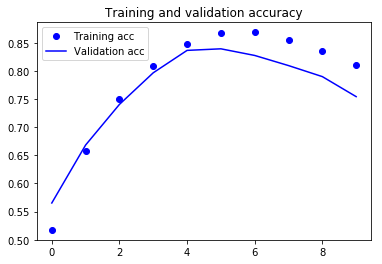

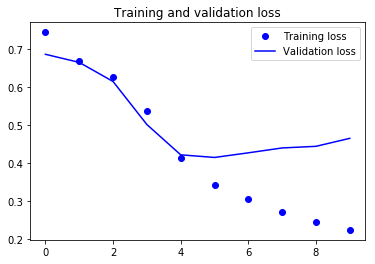

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()